### 11.13 첫 실험
- 일단 데이터세트 전부 number, loss 조정해서 돌리기

In [90]:
import pandas as pd
import re
from datetime import datetime

data = """
90.8(4.8) 80.3(11.8) 65.5(5.7) 78.9(10.8) 91.1(8.0) 91.4(7.7) 94.2(2.2) 84.5(7.6) 87.1(5.1) 97.3(1.1)
91.0(6.0) 79.5(11.1) 79.0(7.9) 88.0(10.2) 90.1(6.7) 93.1(4.2) 95.7(1.9) 88.9(6.4) 90.3(6.1) 95.7(2.3)
94.5(3.6) 83.5(8.2) 85.5(7.0) 92.3(5.2) 93.6(6.1) 94.7(4.1) 96.3(2.0) 91.4(3.8) 93.3(4.8) 97.2(1.5)
96.3(2.3) 89.2(5.5) 94.5(5.0) 96.4(3.8) 96.0(4.0) 96.3(4.1) 96.5(3.1) 91.8(2.7) 93.7(4.5) 98.0(1.2)
96.6(2.0) 88.4(6.1) 95.0(4.7) 97.8(2.7) 96.2(3.3) 97.4(1.6) 97.0(1.9) 92.3(2.8) 93.5(3.6) 97.7(1.7)
97.1(1.8) 91.3(5.8) 96.2(3.2) 97.1(3.0) 96.4(3.3) 97.9(1.2) 97.1(2.3) 92.6(3.5) 93.9(2.4) 98.2(1.0)
97.2(2.1) 91.1(4.5) 97.5(2.6) 97.3(3.1) 97.6(3.3) 97.6(2.1) 97.2(1.7) 92.6(3.5) 94.5(2.1) 98.4(0.7)
"""

# 각 행을 공백을 기준으로 나누고, 괄호 이후의 숫자 및 괄호를 제외한 숫자만 리스트에 담기
data_cleaned = [[re.sub(r'\([^)]*\)', '', num) for num in row.split()] for row in data.strip().split('\n')]
col_list = ['LR', 'SVM', 'RF', 'LGB', 'XGB', 'MLP', 'DeepSAD', 'DevNet', 'FeaWAD', 'PReNet']
# DataFrame 생성
df = pd.DataFrame(data_cleaned, columns = col_list, dtype=float)

# 결과 출력
print(df)

     LR   SVM    RF   LGB   XGB   MLP  DeepSAD  DevNet  FeaWAD  PReNet
0  90.8  80.3  65.5  78.9  91.1  91.4     94.2    84.5    87.1    97.3
1  91.0  79.5  79.0  88.0  90.1  93.1     95.7    88.9    90.3    95.7
2  94.5  83.5  85.5  92.3  93.6  94.7     96.3    91.4    93.3    97.2
3  96.3  89.2  94.5  96.4  96.0  96.3     96.5    91.8    93.7    98.0
4  96.6  88.4  95.0  97.8  96.2  97.4     97.0    92.3    93.5    97.7
5  97.1  91.3  96.2  97.1  96.4  97.9     97.1    92.6    93.9    98.2
6  97.2  91.1  97.5  97.3  97.6  97.6     97.2    92.6    94.5    98.4


/home/ppleeqq/IMvsAD/log/plot/anomaly_imbalanced_14-14-33.png


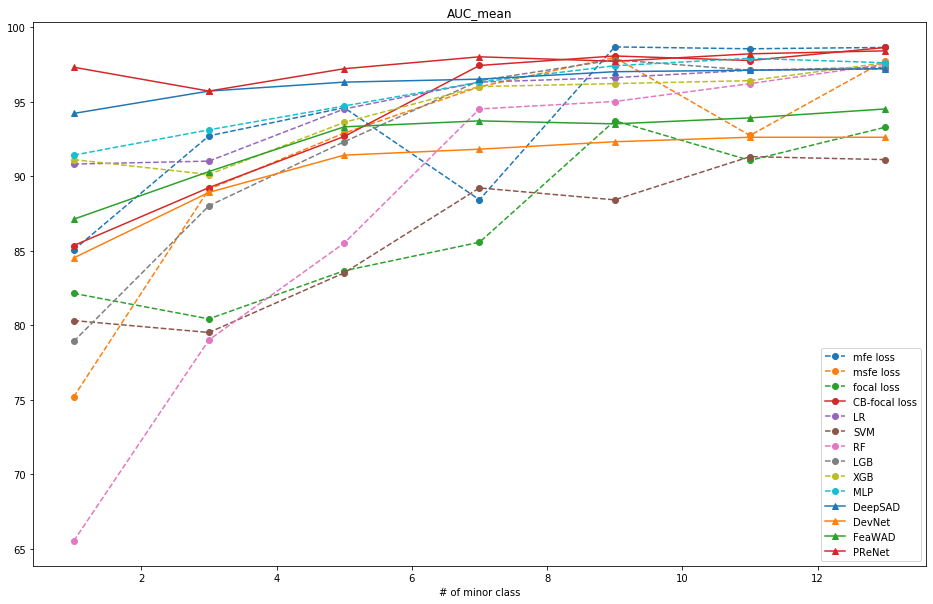

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

au = [65]*7
auc_list1 = []
auc_list2 = []
auc_list3 = []
auc_list4 = []
minor_list = [1,3,5,7,9,11,13]

for i in minor_list:
    df1 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_mfe_none_minor_{i}.csv')
    auc_list1.append(df1['AUC_mean'].iloc[-1])

    df2 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_msfe_none_minor_{i}.csv')
    auc_list2.append(df2['AUC_mean'].iloc[-1])

    df3 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_focal_none_minor_{i}.csv')
    auc_list3.append(df3['AUC_mean'].iloc[-1])

    df4 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-16/2_annthyroid_class-balanced_none_minor_{i}.csv')
    auc_list4.append(df4['AUC_mean'].iloc[-1])

plt.figure(figsize=(16, 10))
plt.plot(minor_list, auc_list1, linestyle='--', label = 'mfe loss', marker = 'o')
plt.plot(minor_list, auc_list2, linestyle='--', label = 'msfe loss',marker = 'o')
plt.plot(minor_list, auc_list3, linestyle='--', label = 'focal loss',marker = 'o')
plt.plot(minor_list, auc_list4, linestyle='-', label = 'CB-focal loss',marker = 'o')


col_list1 = col_list[:6]
col_list2 = col_list[6:]

for col in col_list1:
    plt.plot(minor_list,df[col].tolist(),linestyle='--', label = col, marker = 'o')

for col in col_list2:
    plt.plot(minor_list,df[col].tolist(),linestyle='-', label = col, marker = '^')

plt.legend()
plt.title('AUC_mean')
plt.xlabel('# of minor class')
now = datetime.now()
formatted = now.strftime('%H-%M-%S')
name = '/home/ppleeqq/IMvsAD/log/plot/anomaly_imbalanced_'+formatted+'.png'
plt.savefig(name)
print(name)
plt.show()

/home/ppleeqq/IMvsAD/log/plot/anomaly_imbalanced_14-14-34.png


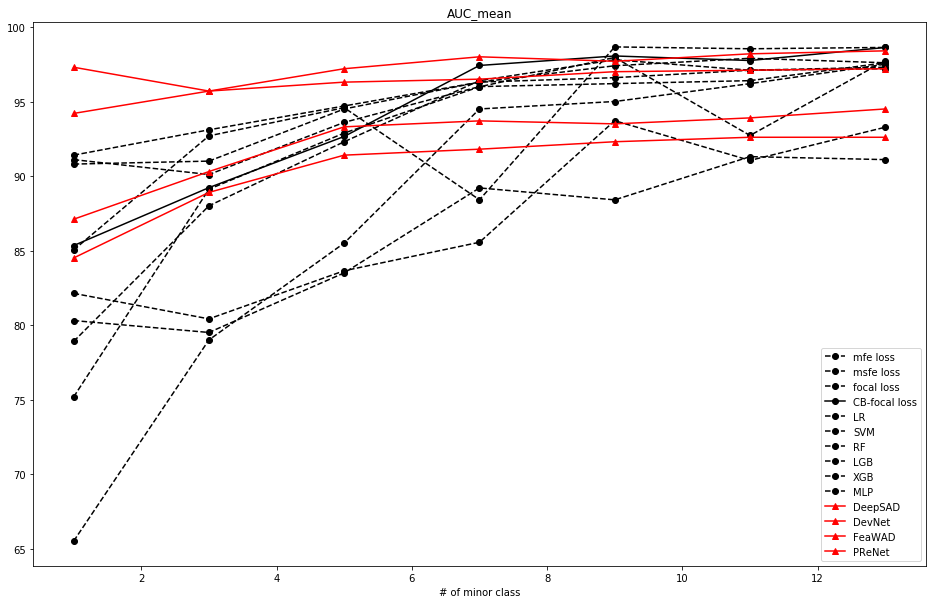

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

au = [65]*7
auc_list1 = []
auc_list2 = []
auc_list3 = []
auc_list4 = []
minor_list = [1,3,5,7,9,11,13]

for i in minor_list:
    df1 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_mfe_none_minor_{i}.csv')
    auc_list1.append(df1['AUC_mean'].iloc[-1])

    df2 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_msfe_none_minor_{i}.csv')
    auc_list2.append(df2['AUC_mean'].iloc[-1])

    df3 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_focal_none_minor_{i}.csv')
    auc_list3.append(df3['AUC_mean'].iloc[-1])

    df4 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-16/2_annthyroid_class-balanced_none_minor_{i}.csv')
    auc_list4.append(df4['AUC_mean'].iloc[-1])

plt.figure(figsize=(16, 10))
plt.plot(minor_list, auc_list1, linestyle='--', label = 'mfe loss', marker = 'o', color='black')
plt.plot(minor_list, auc_list2, linestyle='--', label = 'msfe loss',marker = 'o', color='black')
plt.plot(minor_list, auc_list3, linestyle='--', label = 'focal loss',marker = 'o', color='black')
plt.plot(minor_list, auc_list4, linestyle='-', label = 'CB-focal loss',marker = 'o', color='black')

col_list1 = col_list[:6]
col_list2 = col_list[6:]

for col in col_list1:
    plt.plot(minor_list,df[col].tolist(),linestyle='--', label = col, marker = 'o', color='black')

for col in col_list2:
    plt.plot(minor_list,df[col].tolist(),linestyle='-', label = col, marker = '^', color='red')

plt.legend()
plt.title('AUC_mean')
plt.xlabel('# of minor class')
now = datetime.now()
formatted = now.strftime('%H-%M-%S')
name = '/home/ppleeqq/IMvsAD/log/plot/anomaly_imbalanced_'+formatted+'.png'
plt.savefig(name)
print(name)
plt.show()



In [93]:
import pandas as pd
import matplotlib.pyplot as plt


auc_list2 = []
auc_list3 = []
auc_list4 = []
minor_list = [1,3,5,7,9,11,13]

for i in minor_list:
    auc_list1 = []

    df1 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_mfe_none_minor_{i}.csv')
    auc_list1.append(df1['AUC_mean'].iloc[-1])

    df2 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_msfe_none_minor_{i}.csv')
    auc_list1.append(df2['AUC_mean'].iloc[-1])

    df3 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_focal_none_minor_{i}.csv')
    auc_list1.append(df3['AUC_mean'].iloc[-1])

    df4 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-16/2_annthyroid_class-balanced_none_minor_{i}.csv')
    auc_list1.append(df4['AUC_mean'].iloc[-1])

    auc_list2.append(sum(auc_list1))

print(auc_list2)

for i in range(7):
    mean_im_method = (df.iloc[i,:6].sum() + auc_list2[i]) / 10
    auc_list3.append(mean_im_method)
    mean_ad_method = df.iloc[i,6:].mean()
    auc_list4.append(mean_ad_method)

plt.plot(minor_list,auc_list3,linestyle='--', label = im_method_mean, marker = 'o', color='black')
plt.plot(minor_list,auc_list4,linestyle='-', label = ad_method_mean, marker = '^', color='red')

plt.legend()
plt.title('AUC_mean')
plt.xlabel('# of minor class')
now = datetime.now()
formatted = now.strftime('%H-%M-%S')
name = '/home/ppleeqq/IMvsAD/log/plot/anomaly_imbalanced_'+formatted+'.png'
plt.savefig(name)
print(name)
plt.show()



[327.66928589897606, 351.440097989956, 363.7618113125053, 367.36505941192127, 388.38826442745767, 380.0568482481457, 388.2678575831606]


NameError: name 'im_method_mean' is not defined

/home/ppleeqq/IMvsAD/log/plot/anomaly_imbalanced_13-53-32.png


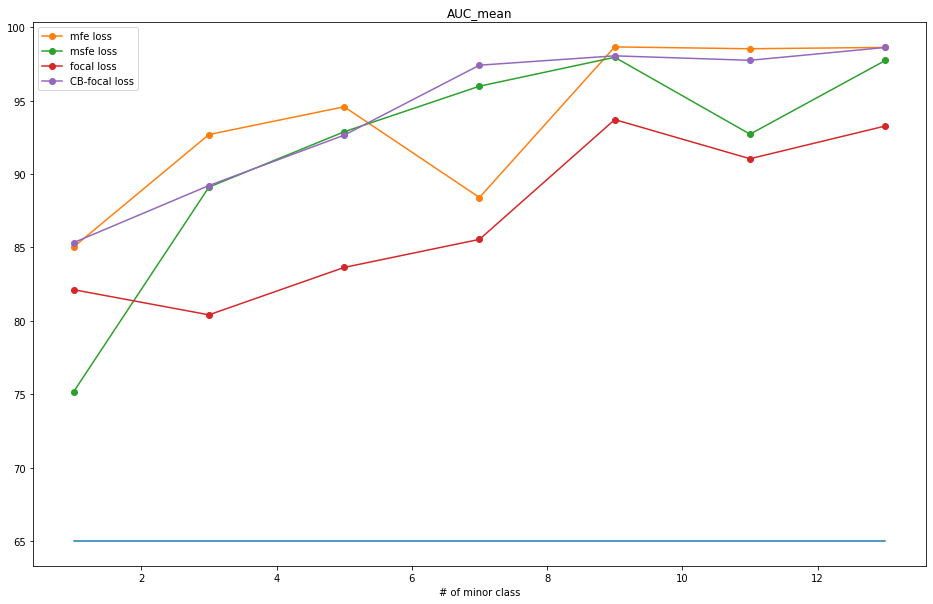

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

au = [65]*7
auc_list1 = []
auc_list2 = []
auc_list3 = []
auc_list4 = []

minor_list = [1,3,5,7,9,11,13]

for i in minor_list:
    df1 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_mfe_none_minor_{i}.csv')
    auc_list1.append(df1['AUC_mean'].iloc[-1])

    df2 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_msfe_none_minor_{i}.csv')
    auc_list2.append(df2['AUC_mean'].iloc[-1])

    df3 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_focal_none_minor_{i}.csv')
    auc_list3.append(df3['AUC_mean'].iloc[-1])

    df4 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-16/2_annthyroid_class-balanced_none_minor_{i}.csv')
    auc_list4.append(df4['AUC_mean'].iloc[-1])
    

plt.figure(figsize=(16, 10))
plt.plot(minor_list, au, linestyle='-')
plt.plot(minor_list, auc_list1, linestyle='-', label = 'mfe loss', marker = 'o')
plt.plot(minor_list, auc_list2, linestyle='-', label = 'msfe loss',marker = 'o')
plt.plot(minor_list, auc_list3, linestyle='-', label = 'focal loss',marker = 'o')
plt.plot(minor_list, auc_list4, linestyle='-', label = 'CB-focal loss',marker = 'o')

plt.legend()
plt.title('AUC_mean')
plt.xlabel('# of minor class')
now = datetime.now()
formatted = now.strftime('%H-%M-%S')
name = '/home/ppleeqq/IMvsAD/log/plot/anomaly_imbalanced_'+formatted+'.png'
plt.savefig(name)
print(name)
plt.show()
